<a href="https://colab.research.google.com/github/HugoKD/NLP/blob/main/LLMs_for_question_annotations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>  Traitement automatique de la langue naturelle, Annotation de questions avec Wikidata <br>   </center>

### Membres:

- Henri NGO
- Hugo Cadet  


## 1. DESCRIPTION

Dans le cadre de ce projet, on effectue une annotation de questions en langue naturelle en utilisant différents modèles avec pour objectif ultime de proposer une méthode qui dépasse les performances des équipes concurrentes.

Par exemple, étant donnée la question:
What is the country for head of state of Justin Trudeau ?
Votre modèle devra retourner :
what is the <\<wd:Q6256\>> for <\<wdt:P35\>> of <\<wd:Q3099714\>> ?

Les éléments ayant pour préfixe wd sont des URIs de Wikidata. Par exemple wd:Q6256 correspond à l'URI https://www.wikidata.org/wiki/Q6256

Wikidata est une base de données collaborative et structurée qui fait partie du projet Wikimedia, tout comme Wikipédia. Contrairement à Wikipédia, qui se concentre sur la création et la gestion de contenu encyclopédique, Wikidata se spécialise dans la collecte et la gestion de données structurées.

**Ressources Wikidata :**

Les ressources sont des entités du monde réel avec un identifiant unique précédé du préfixe "wd".

Voici quelques exemples d'éléments :

1. **La Tour Eiffel (Identifiant : Q243)** - Il s'agit d'un élément représentant la célèbre tour située à Paris.

2. **Albert Einstein (Identifiant : Q937)** - C'est un élément qui représente le physicien renommé.

3. **Mona Lisa (La Joconde) (Identifiant : Q12418)** - Un élément correspondant à l'œuvre d'art iconique de Leonardo da Vinci.

**Propriétés Wikidata :**

Les propriétés sont des caractéristiques ou des informations spécifiques associées aux éléments. Chaque propriété a un identifiant unique avec l'un des préfixes suivant: "wdt", "ps" ou "pq" et est utilisée pour décrire, quantifier ou qualifier les éléments. Voici des exemples de propriétés avec les éléments correspondants :

1. **Hauteur (Propriété : P2049)** - Une propriété utilisée pour indiquer la hauteur d'une structure. Par exemple, la hauteur de la Tour Eiffel est stockée dans cette propriété.

2. **Date de naissance (Propriété : P569)** - Une propriété pour enregistrer la date de naissance des individus. Par exemple, la date de naissance d'Albert Einstein est stockée grâce à cette propriété.

3. **Créateur (Propriété : P170)** - Cette propriété est utilisée pour spécifier qui a créé une œuvre d'art. Dans le cas de la Mona Lisa, on associe cette propriété à l'élément correspondant pour indiquer que Leonardo da Vinci en est le créateur.


Le jeu de données utilisé comprend des questions rédigées en langage naturel, ainsi que ces mêmes questions annotées avec des identifiants provenant de la base de connaissances Wikidata.

Pour illustrer ce jeu de données, voici un exemple :

| question_id |        question_raw        |                 question_original                 |              question_tagged               |
| :---------: | :------------------------: | :---------------------------------------------: | :---------------------------------------: |
|     1       | What is the country for head of state of Justin Trudeau | What is the {country} for {head of state} of {Justin Trudeau} | what is the <\<wd:Q6256\>> for <\<wdt:P35\>> of <\<wd:Q3099714\>> |


Vous pouvez trouver la correspondance des éléments dans les liens suivants:
- __{country}__ : https://www.wikidata.org/wiki/Q6256
- __{head of state}__ : https://www.wikidata.org/wiki/Property:P35
- __{Justin Trudeau}__ : https://www.wikidata.org/wiki/Q3099714  

## 2. LIBRARIES PERMISES
- Numpy
- Pandas
- HuggingFace
- Keras
- NLTK
- SPACY
- Pytorch
- re


- Pour toute autre librairie, demandez à votre chargé de laboratoire

## 6. DESCRIPTION DES DONNÉES ET MÉTRIQUES D’ÉVALUATION

Le corpus est un corpus de questions annotées avec leur identifiant Wikidata. Trois documents sont fournis :
- Les 19603 questions annotées d’entrainement dans un fichier train.csv.
- Les 2183 questions annotées de validation dans un fichier validation.csv.
- Les 5446 questions de test pour lesquelles on doit identifier les URIs wikidata.

La sortie de notre modèle sera comparée à notre ensemble de référence. Evaluation en utilisant la métrique « F1-Score Macro » sur les identifiants prédits par vos modèles dans la compétition Kaggle.

Voici un exemple :

Jeu de test pour la compétition:

|   question_id   |           question_raw          |
|    :----:       | :-----------------------------: |
|      1          | what is the country for head... |
|      2          | what is child of of husband...  |



Soumission:


|   Id   |   question_id   |        label                |
|    :----:     |      :----:     | :------------------: |
|      1        |        1        |       country        |
|      2        |        1        |    head of state     |
|      3        |        1        |   Justin Trudeau     |
|      4        |        2        |      child of        |
|      5        |        2        |       husband        |
|      6        |        2        |    Ranavalona I      |


Le fichier de soumission contient deux colonnes: __Id__ et __Target__ et contenir les URIs reliées aux Id donnés dans _id_to_label.csv_

|   Id       |                  Target                 |
|    :----:  |           :----------------:            |
|      1     |                wd:Q6256                 |
|      2     |                 wdt:P35                 |
|      3     |               wd:Q3099714               |
|      4     |     __Prédiction de votre modèle__      |
|      5     |     __Prédiction de votre modèle__      |
|      6     |     __Prédiction de votre modèle__      |


## 7.

#### Étape prélimininaire : Chargement des données et des librairies


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA A100-SXM4-40GB


In [ ]:
!pip install transformers tensorflow_text sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import pathlib
import re

import nltk
from nltk.translate.bleu_score import sentence_bleu
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re

from transformers import pipeline, BertTokenizer,TFBertModel,TFBertForTokenClassification, BertForTokenClassification
import torch
from torch.utils.data import TensorDataset, random_split, SequentialSampler

In [ ]:
class DataLoader:
  """
  Class to load data and create DataFrame
  """

  def __init__(self, training_path: str, validation_path: str, test_path: str, id_to_label_path: str) -> None:
        """
        Init .train, .val, .test, .id_to_label and load data from their path
        """

        self.train_original = pd.read_csv(training_path, delimiter="|", encoding="utf-8", header=0)
        self.val_original = pd.read_csv(validation_path, delimiter="|", encoding="utf-8", header=0)
        self.test_original = pd.read_csv(test_path, delimiter="|", encoding="utf-8", header=0)
        self.id_to_label_original = pd.read_csv(id_to_label_path)


In [ ]:
root = '/content/'

In [ ]:
# Init an object of the class DataLoader to load data
data_loader = DataLoader(
    training_path=root + 'train.csv',
    validation_path = root +'validation.csv',
    test_path = root + 'test.csv',
    id_to_label_path = root + 'id_to_label.csv'
)

#### Étape prélimininaire : Preprocessing des données

In [ ]:
from transformers import BertTokenizer

# We choose the Bert's Tokenizer to preprocess our data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
class preprocesser:
    """
    Class for preprocessing function
    """

    def __init__(self):
      """
      Init the tokenizer for the preprocessing data
      """
      self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    def get_sentence_labels(self, train_preprocessed : pd.DataFrame):
      """
      Methods that generate labels from tokenized phrases and question_tagged
      """
      data_processed = train_preprocessed.copy()
      labels = []
      counter = 0
      for sentence, sentence_question_tagged in zip(train_preprocessed['question_original_tokens'], train_preprocessed['tags']):
        sentence_labels = []

        i = 0
        j = 0
        nombre_d_occurrences = 0

        for token in sentence:
          nombre_d_occurrences += (token.count('{') or token.count('<'))

        if nombre_d_occurrences == len(sentence_question_tagged):

          while i < len(sentence):
            if sentence[i] != '{':
              sentence_labels.append('O')
              i += 1
            else :
              sentence_labels.append(f"B-{sentence_question_tagged[j]}")
              i+=1
              while sentence[i] != '}':
                sentence_labels.append(f"I-{sentence_question_tagged[j]}")
                i+=1
              sentence_labels.append(f"I-{sentence_question_tagged[j]}")
              i+=1
              j+=1
          labels.append(sentence_labels)
        else :
          labels.append(sentence_labels)

      return labels

    def get_only_target(self, sentence: str):
        """
        Methods that get target from question_tagged
        """
        sentence = re.findall(r'<<([^>>]+)>>', sentence)
        return sentence

    def tokenize(self, sentence: str):
        """
        Tokenize methods for question_original
        """

        tokens = self.tokenizer.convert_tokens_to_string(self.tokenizer.tokenize(sentence))
        tokens = tokens.split()

        return tokens


    def denoise(self, sentence: str):
      """
      Treat sentences with  '<<','>>','{{','}}' and simple '>', '<'
      """
      sentence = re.sub('{{','{', sentence)
      sentence = re.sub('<<','{', sentence)
      sentence = re.sub('}}', '}', sentence)
      sentence = re.sub('>>','}', sentence)

      sentence = re.sub('<','{', sentence)
      sentence = re.sub('>','}', sentence)

      return sentence

    def sample_error(self, train_preprocessed: pd.DataFrame):
      """
      Check if the number of tokens match the number of labels
      if not, del the sample
      """

      counter = 0
      Index = []
      for i in range(len(train_preprocessed['question_original_tokens'])):
        sen = train_preprocessed['sentence_labels'].iloc[i]
        lab = train_preprocessed['question_original_tokens'].iloc[i]

        if len(sen) != len(lab):
          Index.append(i)
          counter+=1
      return train_preprocessed.drop(Index)

In [ ]:
preprocesser = preprocesser()

In [ ]:
def generate_train_preprocessed(train_original : pd.DataFrame, preprocesser : preprocesser):
  train_preprocessed = train_original.copy()

  #Denoising and treatement of '<<', '>>' ...
  train_preprocessed['question_original_tokens'] = train_preprocessed['question_original'].copy().apply(preprocesser.denoise)

  #Tokenize question_original
  train_preprocessed['question_original_tokens'] = train_preprocessed['question_original_tokens'].apply(preprocesser.tokenize)

  #Create liste of target for each sentence
  train_preprocessed['tags'] = train_preprocessed['question_tagged'].copy().apply(preprocesser.get_only_target)

  #Generate questions_labels in format BIO
  train_preprocessed['sentence_labels'] = preprocesser.get_sentence_labels(train_preprocessed)

  #Delete sample where the number of labels doesn't match the number of tokens for each sentence
  train_preprocessed = preprocesser.sample_error(train_preprocessed)

  return train_preprocessed


In [ ]:
train_original = data_loader.train_original
val_original = data_loader.val_original

#Generate train DataFrame
train = generate_train_preprocessed(train_original, preprocesser)

#Generate validation DataFrame
val = generate_train_preprocessed(val_original, preprocesser)

### 7.0. Analyse exploratoire (5%)


#### 7.0.1. Déterminez le nombre d'identifiants uniques du jeu d'entrainement


In [ ]:
train

,question_id,question_original,question_raw,question_tagged,question_original_tokens,tags,sentence_labels
0,1,What is {child of} of {husband} of {Ranavalona...,what is child of of husband of ranavalona i ?,what is <<wdt:P22>> of <<wdt:P26>> of <<wd:Q16...,"[what, is, {, child, of, }, of, {, husband, },...","[wdt:P22, wdt:P26, wd:Q169794]","[O, O, B-wdt:P22, I-wdt:P22, I-wdt:P22, I-wdt:..."
1,2,Did {Jeff_Bridges} {occupation} {Lane Chandler...,did jeff _ bridges occupation lane chandler an...,did <<wd:Q174843>> <<wdt:P106>> <<wd:Q1804811>...,"[did, {, jeff, _, bridges, }, {, occupation, }...","[wd:Q174843, wdt:P106, wd:Q1804811, wd:Q33231]","[O, B-wd:Q174843, I-wd:Q174843, I-wd:Q174843, ..."
2,3,Give me {cola} that starts with {'p'},give me cola that starts with ' p ',give me <<wd:Q134041>> that starts with <<'p'>>,"[give, me, {, cola, }, that, starts, with, {, ...","[wd:Q134041, 'p']","[O, O, B-wd:Q134041, I-wd:Q134041, I-wd:Q13404..."
3,4,What is {prizewinner} of {sequel is} of {1885 ...,what is prizewinner of sequel is of 1885 wimbl...,what is <<wdt:P1346>> of <<wdt:P156>> of <<wd:...,"[what, is, {, prizewinner, }, of, {, sequel, i...","[wdt:P1346, wdt:P156, wd:Q1356316]","[O, O, B-wdt:P1346, I-wdt:P1346, I-wdt:P1346, ..."
4,5,Does the {carbon footprint} of the {iPhone Xs ...,does the carbon footprint of the iphone xs max...,does the <<wdt:P5991>> of the <<wd:Q56599233>>...,"[does, the, {, carbon, footprint, }, of, the, ...","[wdt:P5991, wd:Q56599233, =, 106]","[O, O, B-wdt:P5991, I-wdt:P5991, I-wdt:P5991, ..."
...,...,...,...,...,...,...,...
19598,19599,What is <destroyed> of <First Carlist War> ?,what is destroyed of first carlist war ?,what is <<wdt:P3082>> of <<wd:Q2341073>> ?,"[what, is, {, destroyed, }, of, {, first, carl...","[wdt:P3082, wd:Q2341073]","[O, O, B-wdt:P3082, I-wdt:P3082, I-wdt:P3082, ..."
19599,19600,What is <adjacent building> of <Tate Modern> ?,what is adjacent building of tate modern ?,what is <<wdt:P3032>> of <<wd:Q193375>> ?,"[what, is, {, adjacent, building, }, of, {, ta...","[wdt:P3032, wd:Q193375]","[O, O, B-wdt:P3032, I-wdt:P3032, I-wdt:P3032, ..."
19600,19601,Does the {number of points/goals/set scored} o...,does the number of points / goals / set scored...,does the <<wdt:P1351>> of the <<wd:Q117206>> <...,"[does, the, {, number, of, points, /, goals, /...","[wdt:P1351, wd:Q117206, =, 45.6]","[O, O, B-wdt:P1351, I-wdt:P1351, I-wdt:P1351, ..."
19601,19602,Does the {boiling point} of the {methanol} {eq...,does the boiling point of the methanol equals ...,does the <<wdt:P2102>> of the <<wd:Q14982>> <<...,"[does, the, {, boiling, point, }, of, the, {, ...","[wdt:P2102, wd:Q14982, =, 117.6]","[O, O, B-wdt:P2102, I-wdt:P2102, I-wdt:P2102, ..."


In [ ]:
train_question_tagged = train["tags"].copy()

from collections import Counter

def build_voc(documents, threshold):
    vocabulary = Counter([word for sentence in documents for word in sentence ])
    return set([word for word, n_occurence in vocabulary.items() if n_occurence >= threshold]), vocabulary

voc_train, dict_train = build_voc(train_question_tagged, 1)
print(voc_train)
len(voc_train)

{'wd:Q103646', 'wd:Q160776', 'wd:Q8072', 'wd:Q35498', 'wd:Q2826888', 'wd:Q311772', 'wdt:P1961', "'Budapest_limit_-_panoramio.jpg'", 'wd:Q429795', 'wd:Q957543', 'wdt:P3942', 'wd:Q8447', 'wd:Q132217', 'wd:Q25419', 'ps:P6', 'wd:Q43252', 'wd:Q133871', 'wdt:P686', 'wd:Q3546003', 'wd:Q29526', 'wd:Q309048', "'uk'", 'wd:Q324878', 'wd:Q130', "'2.72617e+07'", 'wd:Q122195', 'wd:Q15978631', 'wd:Q23015925', 'wd:Q207936', 'wd:Q237324', '26.4', 'wd:Q1130507', 'wdt:P3660', 'wd:Q6186', 'wd:Q275094', 'wdt:P2170', 'wd:Q2405734', 'wd:Q310847', 'wd:Q35497', "'917'", 'wdt:P5295', 'wd:Q3997296', 'wd:Q3806537', 'wd:Q11859', 'wdt:P3927', 'wd:Q103360', 'wdt:P651', 'wdt:P864', 'wd:Q1634717', 'wd:Q37437', 'wd:Q217741', 'wd:Q163758', 'wd:Q750403', 'wd:Q156386', "'beauty'", '144', 'wd:Q16146870', "'0000'", 'wd:Q315618', 'wd:Q12372870', 'wd:Q122069', 'wd:Q480', 'wd:Q315723', 'wd:Q76579', 'wd:Q3290543', 'wd:Q826930', 'wdt:P568', 'wd:Q1575416', 'wd:Q7603', "'philosophy'", "'34.2'", 'wdt:P452', 'wd:Q13270', 'wd:Q232255

22302

#### 7.0.2. Déterminez le pourcentage d'identifiants uniques inconnus du jeu de validation.

Affichez le résultat dans un diagramme circulaire.


In [ ]:
val_question_tagged = val["tags"].copy()

voc_val, dict_val = build_voc(val_question_tagged, 1)

counter = 0
for id in voc_val :
  if id not in voc_train :
    counter += 1

print("Nombre d'identifiants uniques incunnus du jeu de validation =",counter)
print("Pourcentage = ", (round((counter/len(voc_train))*100,2)), "%")

Nombre d'identifiants uniques incunnus du jeu de validation = 1688
Pourcentage =  7.57 %


([<matplotlib.patches.Wedge at 0x7d6e941bb460>,
 [Text(-0.24118038033234498, -1.0732343752148201, 'voc_train'),
  Text(0.24118030496975373, 1.0732343921505203, 'voc_val')],
 [Text(-0.1315529347267336, -0.5854005682989928, '93.0%'),
  Text(0.13155289361986566, 0.5854005775366473, '7.0%')])

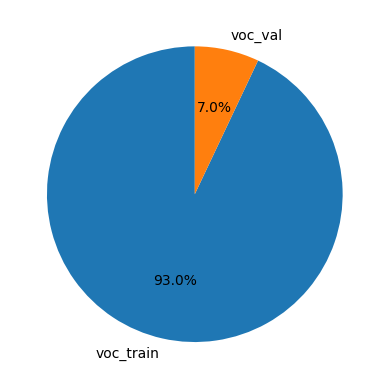

In [ ]:
import matplotlib.pyplot as plt

labels = ['voc_train', 'voc_val']
sizes = [len(voc_train), counter]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

#### 7.0.3. Déterminez les 10 identifiants uniques les plus fréquents du jeu d'entrainement.

Affichez le résultat dans un diagramme à barres.


[('=', 818), ('pq:P585', 616), ('ps:P166', 492), ('pq:P580', 485), ('pq:P582', 412), ('wd:Q5', 404), ('ps:P39', 383), ('wdt:P190', 246), ('wdt:P19', 232), ('wdt:P131', 222), ('ps:P54', 221), ('wdt:P150', 216), ('ps:P26', 209), ('wdt:P20', 207), ('<', 190), ('ps:P1411', 189), ('wdt:P106', 183), ('wdt:P166', 182), ('ps:P69', 178), ('ps:P40', 151), ('wdt:P47', 148), ('wdt:P463', 148), ('wdt:P1269', 146), ('wdt:P138', 143), ('wdt:P17', 141), ('wdt:P530', 138), ('wdt:P40', 137), ('ps:P1082', 135), ('pq:P1350', 132), ('wdt:P26', 130), ('wdt:P61', 130), ('wdt:P710', 129), ('wdt:P69', 129), ('wdt:P276', 128), ('wdt:P1346', 123), ('wdt:P159', 123), ('wdt:P3373', 122), ('wdt:P50', 121), ('wdt:P737', 121), ('wdt:P31', 119), ('wdt:P1412', 117), ("'t'", 113), ('pq:P156', 110), ('wdt:P1082', 107), ('wdt:P1441', 107), ('wdt:P27', 106), ('wdt:P112', 106), ('wdt:P2176', 106), ('wdt:P136', 103), ('pq:P155', 103), ('wdt:P800', 100), ('wdt:P108', 99), ('wdt:P1542', 98), ('wdt:P625', 98), ('pq:P812', 98), 

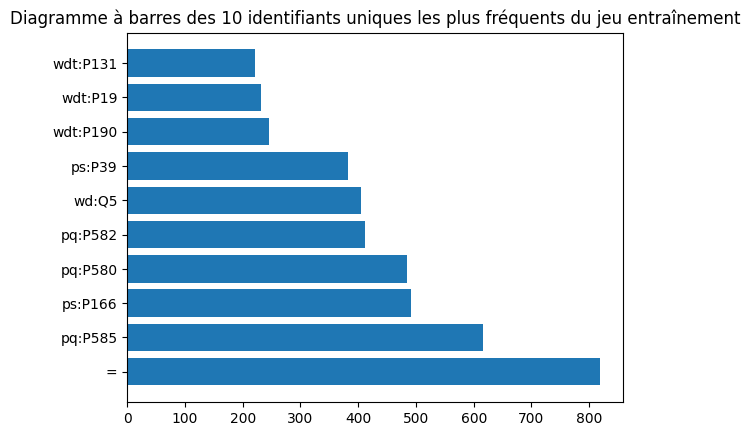

In [ ]:
sorted_dict_train = sorted(dict_train.items(), key=lambda x: x[1], reverse=True)
print(sorted_dict_train)
def print_most_commons(sorted_dict_train):
  id, values = [], []
  for i in range(10):
    id.append(sorted_dict_train[i][0])
    values.append(sorted_dict_train[i][1])
  plt.barh(id, values)
  plt.title('Diagramme à barres des 10 identifiants uniques les plus fréquents du jeu entraînement')
  plt.show()

print_most_commons(sorted_dict_train)

#### 7.0.4. Déterminez la proportion des identifiants uniques qui sont des ressources Wikidata.

Affichez le résultat dans un diagramme circulaire.

19519


([<matplotlib.patches.Wedge at 0x7d6e8de3c4c0>,
 [Text(-0.4202716931693332, 1.0165489186067644, 'only in train'),
  Text(0.4202716455812435, -1.016548938281101, 'Also in Wikidata')],
 [Text(-0.2292391053650908, 0.5544812283309624, '12.5%'),
  Text(0.229239079407951, -0.5544812390624186, '87.5%')])

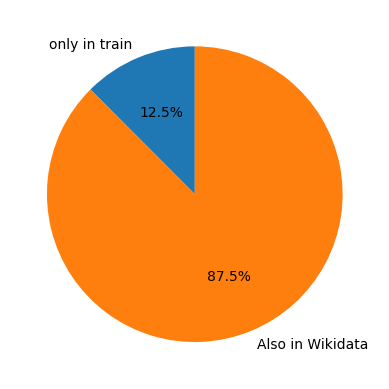

In [ ]:
counter_id_wd = 0
for id in voc_train:
  if id.startswith("wd"):
    counter_id_wd += 1

print(counter_id_wd)

labels_id_wd = ['only in train', 'Also in Wikidata']
sizes_id_wd = [len(voc_train)-counter_id_wd, counter_id_wd]

plt.pie(sizes_id_wd, labels=labels_id_wd, autopct='%1.1f%%', startangle=90)

#### 7.0.5. Déterminez la fréquence de chaque entité Wikidata du jeu d'entrainement, ordonnée par fréquence décroissante et affichez une courbe fréquence - rang.

Création d'un graphique de courbe fréquence-rang pour visualiser la distribution des fréquences. Sur l'axe horizontal (rang), la position des entités triées par ordre décroissant de fréquence, et sur l'axe vertical (fréquence), le nombre d'occurrences de chaque entité.

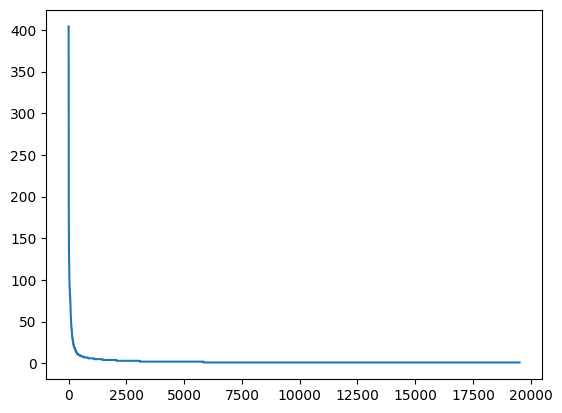

In [ ]:
dict_train_wd = {}
for key, value in dict_train.items():
  if key.startswith("wd"):
    dict_train_wd[key] = value

dict_train_wd_sorted = sorted(dict_train_wd.items(), key=lambda x: x[1], reverse=True)

rang = []
freq = []
for i in range(len(dict_train_wd_sorted)):
  rang.append(i)
  freq.append(dict_train_wd_sorted[i][1])


plt.plot(rang, freq)
plt.show()

### 7.1. Approche par classification de jeton

Entrainement d'un modèle (BERT, ROBERTA, etc.) pour classifier les jetons du __question_original__ avec le bon identifiant de Wikidata.

Votre modèle devrait utiliser le format BIO afin d'effectuer la classification.

Ainsi, si une entité se retrouve dans plusieurs jetons, on indiquera qu'il s'agit du début de l'entité en rajoutant le préfixe __B-__ à la classe. Un jeton faisant partie de l'entité doit avoir le préfixe __I-__ à la classe.

Lorsqu'un jeton ne fait pas partie d'une entité, celui-ci devrait avoir la classe __O__

__Exemple:__

Jeu de validation:

|   question_id   |                  question_original                           |
|    :----:       | :----------------------------------------------:             |
|      1          | What is the {country} for {head of state} of {Justin Trudeau} |



#### 7.1.1. Classification de jetons


#### 7.1.1.1 Processing des données d'entrainement pour Bert

In [ ]:
#Function to generate unique labels
def generate_unique_labels(labels):
  unique_labels = set()

  for sen in labels:
    for token_label in sen:
        if token_label not in unique_labels :
            unique_labels.add(token_label)

  return unique_labels


In [ ]:
labels = train['sentence_labels']
unique_labels = generate_unique_labels(labels)

# Map each unique label to an integer.
label_map = {}

# For each label...
for (i, label) in enumerate(unique_labels):

    # Map it to its integer.
    label_map[label] = i
print(label_map)

{'B-wd:Q82840': 0, 'B-wd:Q7787404': 1, 'I-wd:Q188531': 2, 'I-wd:Q1065250': 3, 'B-0.79': 4, 'B-wdt:P5811': 5, 'I-wd:Q483236': 6, 'B-wdt:P3389': 7, 'I-60': 8, 'I-wd:Q62744': 9, 'I-wd:Q184267': 10, 'I-16663500000': 11, 'I-wd:Q44261': 12, 'B-wd:Q44054': 13, 'I-wdt:P1453': 14, 'I-4.72': 15, 'I-wdt:P2136': 16, 'B-wd:Q38076': 17, 'B-wd:Q6952699': 18, 'I-wd:Q76579': 19, 'B-wd:Q861126': 20, 'I-wd:Q39099': 21, 'I-wd:Q1452793': 22, 'B-wdt:P589': 23, 'I-wd:Q19966700': 24, 'B-wd:Q205961': 25, 'I-wd:Q61588198': 26, 'B-ps:P144': 27, 'I-wd:Q528382': 28, 'B-wdt:P5358': 29, "B-'spirit'": 30, 'B-wd:Q128799': 31, 'B-wd:Q505628': 32, 'B-wd:Q178865': 33, 'I-wd:Q19471': 34, 'B-wd:Q192749': 35, 'I-wd:Q388201': 36, 'I-wd:Q3397519': 37, 'I-wd:Q28972964': 38, 'B-wd:Q820613': 39, 'I-wd:Q3126038': 40, 'I-wd:Q213879': 41, 'B-wd:Q16551': 42, 'B-wd:Q489772': 43, 'B-wd:Q49017': 44, 'B-wd:Q1385703': 45, 'I-wd:Q891827': 46, 'I-5.6': 47, 'B-wd:Q3873525': 48, 'B-wd:Q1052293': 49, 'B-wd:Q156888': 50, 'B-320': 51, 'I-wd:Q12

In [ ]:
sentences = train['question_original_tokens']
labels = train['sentence_labels']

In [ ]:
from transformers import BertTokenizer
import numpy as np

# We'll need the BertTokenizer in order to determine the number of tokens in
# the sentences *according to BERT*.
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Record the length of each sequence.
lengths = []

print('Measuring sentence lengths...')

# For every sentence...
for sen in sentences:
    # Reconstruct the sentence to let BERT decide how to tokenize it.
    sen = ' '.join(sen)

    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sen,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                   )

    # Record the length of the sentence after tokenization.
    lengths.append(len(encoded_sent))
print('    DONE.')

Measuring sentence lengths...
    DONE.


In [ ]:
print('   Min length: {:,} tokens'.format(min(lengths)))
print('   Max length: {:,} tokens'.format(max(lengths)))
print('Median length: {:,} tokens'.format(int(np.median(lengths))))

   Min length: 12 tokens
   Max length: 123 tokens
Median length: 21 tokens


<ipython-input-101-82c5ce17149b>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lengths, kde=False, rug=False)


Text(0, 0.5, '# of Sentences')

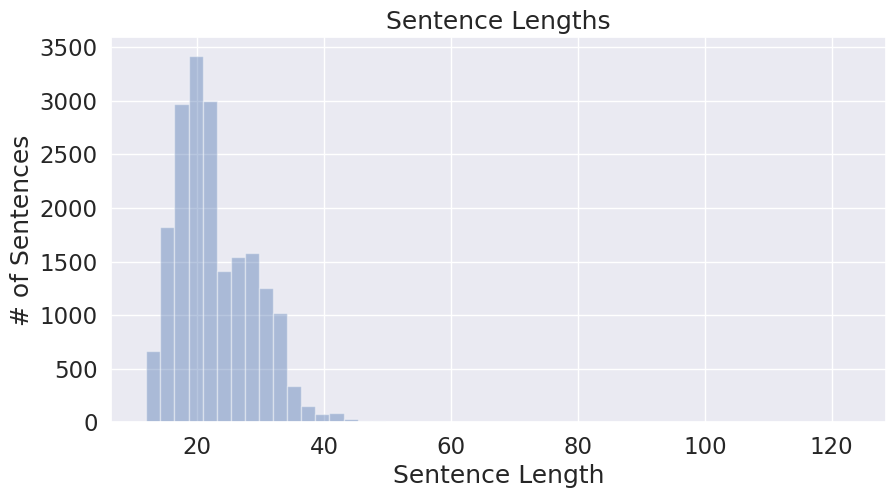

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (10,5)

# Plot the distribution of comment lengths.
sns.distplot(lengths, kde=False, rug=False)

plt.title('Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('# of Sentences')


We are choosing max_length = 50 even if the max lengths is 123

In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
i=0
for sent in sentences:

    # Reconstruct the sentence--otherwise `tokenizer` will interpret the list
    # of string tokens as having already been tokenized by BERT.
    sent_str = ' '.join(sent)

    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent_str,                  # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        truncation = True,
                        max_length = 50,        # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'][0])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'][0])

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])
print('Masks:', attention_masks[0])

#print(input_ids)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  ['what', 'is', '{', 'child', 'of', '}', 'of', '{', 'husband', '}', 'of', '{', 'ranavalona', 'i', '}', '?']
Token IDs: tensor([  101,  2054,  2003,  1063,  2775,  1997,  1065,  1997,  1063,  3129,
         1065,  1997,  1063, 22175, 10175,  7856,  1045,  1065,  1029,   102,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])
Masks: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])


In [ ]:
# New labels for all of the input sentences.
new_labels = []

# The special label ID we'll give to "extra" tokens.
null_label_id = -100


i = 0
# For each sentence...
for (sen, orig_labels) in zip(input_ids, labels):

    # Create a new list to hold the adjusted labels for this sentence.
    padded_labels = []

    # This will be our index into the original label list.
    orig_labels_i = 0
    # For each token in the padded sentence...
    for token_id in sen:
        # Pull the value out of the tensor.
        token_id = token_id.numpy().item()

        # If `[PAD]`, `[CLS]`, or `[SEP]`...
        if (token_id == tokenizer.pad_token_id) or \
            (token_id == tokenizer.cls_token_id) or \
            (token_id == tokenizer.sep_token_id):

            # Assign it the null label.
            padded_labels.append(null_label_id)

        # If the token string starts with "##"...
        elif tokenizer.ids_to_tokens[token_id][0:2] == '##':

            # It's a subword token, and not part of the original dataset, so
            # assign it the null label.
            padded_labels.append(null_label_id)

        # If it's not any of the above...
        else:

            # This token corresponds to one of the original ones, so assign it
            # it's original label.
              # Look up the label for this token.
              label_str = orig_labels[orig_labels_i]

              # Map the label to its ID, and assign it.
              padded_labels.append(label_map[label_str])

              # Increment our index into the original labels list.
              orig_labels_i += 1

    i+=1

    # If we did this right, then the new `padded_labels` list should match
    # the length of the tokenized sentence.
    assert(len(sen) == len(padded_labels))


    # Store the updated labels list for this sentence.
    new_labels.append(padded_labels)


In [ ]:
print('\nSentence:    ', sentences[2])
print('\nLabels:      ', labels[2])
print('\nBERT Tokens: ', tokenizer.tokenize(' '.join(sentences[2])))
print('\nToken IDs:   ', input_ids[2])
print('\nNew Labels:  ', new_labels[2])
print('\nMask:        ', attention_masks[2])


Sentence:     ['give', 'me', '{', 'cola', '}', 'that', 'starts', 'with', '{', "'", 'p', "'", '}']

Labels:       ['O', 'O', 'B-wd:Q134041', 'I-wd:Q134041', 'I-wd:Q134041', 'O', 'O', 'O', "B-'p'", "I-'p'", "I-'p'", "I-'p'", "I-'p'"]

BERT Tokens:  ['give', 'me', '{', 'cola', '}', 'that', 'starts', 'with', '{', "'", 'p', "'", '}']

Token IDs:    tensor([  101,  2507,  2033,  1063, 15270,  1065,  2008,  4627,  2007,  1063,
         1005,  1052,  1005,  1065,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])

New Labels:   [-100, 35367, 35367, 44476, 27332, 27332, 35367, 35367, 35367, 23385, 44464, 44464, 44464, 44464, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,

In [ ]:
# Convert the lists into PyTorch tensors.

# `input_ids` is a list of tensor arrays--stack
pt_input_ids = torch.stack(input_ids, dim=0)

# `attention_masks` is a list of tensor arrays--stack
pt_attention_masks = torch.stack(attention_masks, dim=0)

# Labels is a list of lists. Convert it into a tensor
pt_labels = torch.tensor(new_labels, dtype=torch.long)

#### 7.1.1.2 Setup de l'entrainement de Bert

In [ ]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(pt_input_ids, pt_attention_masks, pt_labels)

# We will train on the entire dataset of train and validate the model on the validation set given
train_size = int(1 * len(dataset))
val_size = len(dataset) - train_size # = 0 in our case

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

19,415 training samples
    0 validation samples


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it
# here. For fine-tuning BERT on a specific task, the authors recommend a batch
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order.
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
# This is the number of labels in our dataset, so we will be doing 44605-way classification (all labels plus our padding label)
len(label_map)

44605

In [ ]:
from transformers import BertForTokenClassification, AdamW, BertConfig, DistilBertForTokenClassification


# Load BertForTokenClassification
model = BertForTokenClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = len(label_map) + 1, # The number of output labels--44605 for our NER dataset
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, el

In [ ]:
# Load the AdamW optimizer
optimizer = AdamW(model.parameters(),
                  lr = 5e-5, # args.learning_rate
                  eps = 1e-8 # args.adam_epsilon
                )


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs : 20
epochs = 20

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

#### 7.1.1.3 Boucle d'entrainement de Bert

In [ ]:
import time
import numpy as np
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [ ]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because
        # accumulating the gradients is "convenient while training RNNs".
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()

        # In PyTorch, calling `model` will in turn call the model's `forward`
        # function and pass down the arguments. The `forward` function is
        # documented here:
        # https://huggingface.co/transformers/model_doc/bert.html#bertfortokenclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.TokenClassifierOutput
        result = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels)

        loss = result.loss

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)

    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))


print("")
print("Training complete!")

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [ ]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = './model_save_bert_20epoch/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
#torch.save(args, os.path.join(output_dir, 'training_args.bin'))


Saving model to ./model_save_bert_20epoch/


NameError: ignored

#### 7.1.1.4 Processing des données de validation pour Bert

In [ ]:
labels = val['sentence_labels']
unique_labels_validation = generate_unique_labels(labels)

for label in unique_labels_validation:
    if label not in label_map:
        # Assign a new index for the new label
        new_index = len(label_map)
        label_map[label] = new_index
print(label_map)

{'B-wd:Q818882': 0, 'I-wd:Q216622': 1, 'I-wd:Q2566555': 2, 'I-wd:Q133087': 3, 'I-wd:Q122248': 4, 'I-wdt:P1622': 5, 'I-wd:Q14013': 6, 'I-wd:Q171318': 7, 'B-wd:Q51797': 8, 'B-wd:Q311655': 9, 'B-102.7': 10, "B-'oxygen'": 11, 'I-wd:Q79': 12, 'B-wd:Q7623961': 13, 'B-wd:Q184337': 14, 'B-wd:Q315826': 15, 'I-wd:Q18216': 16, 'I-wd:Q1857064': 17, 'B-wd:Q88498': 18, 'B-7.2': 19, 'I-wd:Q2805': 20, 'I-924000.0': 21, 'I-wd:Q2547121': 22, 'B-wd:Q1621261': 23, 'B-wd:Q259278': 24, "B-'47.7'": 25, 'B-wd:Q34589': 26, 'B-wd:Q1146824': 27, 'B-wd:Q307578': 28, 'B-wd:Q11024': 29, 'B-ps:P2962': 30, 'I-wdt:P4909': 31, 'I-wd:Q13967': 32, 'B-wdt:P959': 33, 'I-wd:Q1558289': 34, 'I-wd:Q22084776': 35, 'I-wd:Q15964890': 36, 'I-wd:Q14343': 37, 'B-wd:Q1985501': 38, 'B-wd:Q162492': 39, 'B-ps:P495': 40, 'I-wd:Q13980': 41, 'I-wd:Q706': 42, 'I-ps:P1109': 43, 'B-wd:Q858422': 44, "B-'zauberstück'": 45, 'I-wd:Q118251': 46, 'B-wd:Q219831': 47, 'B-wd:Q191826': 48, "I-'linux'": 49, 'I-wd:Q146075': 50, 'B-wd:Q36': 51, 'I-wd:Q100

In [ ]:
sentences = val['question_original_tokens']
labels = val['sentence_labels']

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:

    # Reconstruct the sentence--otherwise `tokenizer` will interpret the list
    # of string tokens as having already been tokenized by BERT.
    sent_str = ' '.join(sent)

    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent_str,                  # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 50,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'][0])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'][0])

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])
print('Masks:', attention_masks[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  ['what', 'is', 'the', '{', 'essential', 'medicine', '}', 'for', '{', 'medical', 'condition', 'treated', '}', 'of', '{', 'leprosy', '}']
Token IDs: tensor([  101,  2054,  2003,  1996,  1063,  6827,  4200,  1065,  2005,  1063,
         2966,  4650,  5845,  1065,  1997,  1063,  3393, 21572,  6508,  1065,
          102,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])
Masks: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])


In [ ]:
# New labels for all of the input sentences.
new_labels = []

# The special label ID we'll give to "extra" tokens.
null_label_id = -100

# For each sentence...
for (sen, orig_labels) in zip(input_ids, labels):

    # Create a new list to hold the adjusted labels for this sentence.
    padded_labels = []

    # This will be our index into the original label list.
    orig_labels_i = 0

    # For each token in the padded sentence...
    for token_id in sen:

        # Pull the value out of the tensor.
        token_id = token_id.numpy().item()

        # If `[PAD]`, `[CLS]`, or `[SEP]`...
        if (token_id == tokenizer.pad_token_id) or \
            (token_id == tokenizer.cls_token_id) or \
            (token_id == tokenizer.sep_token_id):

            # Assign it the null label.
            padded_labels.append(null_label_id)

        # If the token string starts with "##"...
        elif tokenizer.ids_to_tokens[token_id][0:2] == '##':

            # It's a subword token, and not part of the original dataset, so
            # assign it the null label.
            padded_labels.append(null_label_id)

        # If it's not any of the above...
        else:

            # This token corresponds to one of the original ones, so assign it
            # it's original label.

            # Look up the label for this token.
            label_str = orig_labels[orig_labels_i]

            # Map the label to its ID, and assign it.
            padded_labels.append(label_map[label_str])

            # Increment our index into the original labels list.
            orig_labels_i += 1

    # If we did this right, then the new `padded_labels` list should match
    # the length of the tokenized sentence.
    assert(len(sen) == len(padded_labels))

    # Store the updated labels list for this sentence.
    new_labels.append(padded_labels)


In [ ]:
print('\nSentence:    ', sentences[2])
print('\nLabels:      ', labels[2])
print('\nBERT Tokens: ', tokenizer.tokenize(' '.join(sentences[2])))
print('\nToken IDs:   ', input_ids[2])
print('\nMask:        ', attention_masks[2])
print('\nNew Labels:  ', new_labels[2])


Sentence:     ['what', 'is', '{', 'played', 'by', '}', 'of', '{', 'succeded', 'by', '}', 'of', '{', 'sleepwalking', '}', '?']

Labels:       ['O', 'O', 'B-wdt:P175', 'I-wdt:P175', 'I-wdt:P175', 'I-wdt:P175', 'O', 'B-wdt:P156', 'I-wdt:P156', 'I-wdt:P156', 'I-wdt:P156', 'O', 'B-wd:Q7539946', 'I-wd:Q7539946', 'I-wd:Q7539946', 'O']

BERT Tokens:  ['what', 'is', '{', 'played', 'by', '}', 'of', '{', 'su', '##cc', '##eded', 'by', '}', 'of', '{', 'sleep', '##walk', '##ing', '}', '?']

Token IDs:    tensor([  101,  2054,  2003,  1063,  2209,  2011,  1065,  1997,  1063, 10514,
         9468, 19082,  2011,  1065,  1997,  1063,  3637, 17122,  2075,  1065,
         1029,   102,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])

Mask:         tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 

In [ ]:
# Convert the lists into PyTorch tensors.

# `input_ids` is a list of tensor arrays--stack them into a matrix.
pt_input_ids = torch.stack(input_ids, dim=0)

# `attention_masks` is a list of tensor arrays--stack them into a matrix.
pt_attention_masks = torch.stack(attention_masks, dim=0)

# Labels is a list of lists. Convert it into a tensor matrix.
pt_labels = torch.tensor(new_labels, dtype=torch.long)

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset
# Set the batch size.
batch_size = 32

# Create the DataLoader.
prediction_data = TensorDataset(pt_input_ids, pt_attention_masks, pt_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

#### 7.1.1.5 Chargement du modèle et prédiction sur l'ensemble de validation

In [ ]:
from transformers import DistilBertForTokenClassification

# Load a trained model and vocabulary that you have fine-tuned
output_dir = './model_save_bert_20epoch/'

model = BertForTokenClassification.from_pretrained(output_dir)
tokenizer = BertTokenizer.from_pretrained(output_dir)

# Copy the model to the GPU.
model.to(device)

BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, el

In [ ]:
# Prediction on test set

print('Predicting labels for {:,} validation sentences...'.format(len(pt_input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables
predictions , true_labels = [], []

# Predict
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)

  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch

  # Telling the model not to compute or store gradients, saving memory and
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      result = model(b_input_ids,
                      token_type_ids=None,
                      attention_mask=b_input_mask,
                      return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 2,166 validation sentences...
    DONE.


#### 7.1.1.6 Mesure de la performance sur l'ensemble de validation

In [ ]:
from sklearn.metrics import f1_score

# First, combine the results across the batches.
all_predictions = np.concatenate(predictions, axis=0)
all_true_labels = np.concatenate(true_labels, axis=0)

print("After flattening the batches, the predictions have shape:")
print("    ", all_predictions.shape)

# Next, let's remove the third dimension (axis 2), which has the scores
# for all 18 labels.

# For each token, pick the label with the highest score.
predicted_label_ids = np.argmax(all_predictions, axis=2)

print("\nAfter choosing the highest scoring label for each token:")
print("    ", predicted_label_ids.shape)

# Finally, for the sake of scoring, we don't actually care about the different
# sentences--we just look at whether the model made correct predictions for the
# individual tokens.

# Eliminate axis 0, which corresponds to the sentences.
predicted_label_ids = np.concatenate(predicted_label_ids, axis=0)
all_true_labels = np.concatenate(all_true_labels, axis=0)

print("\nAfter flattening the sentences, we have predictions:")
print("    ", predicted_label_ids.shape)
print("and ground truth:")
print("    ", all_true_labels.shape)


After flattening the batches, the predictions have shape:
     (2166, 50, 44606)

After choosing the highest scoring label for each token:
     (2166, 50)

After flattening the sentences, we have predictions:
     (108300,)
and ground truth:
     (108300,)


In [ ]:
# Construct new lists of predictions which don't include any null tokens.
real_token_predictions = []
real_token_labels = []

# For each of the input tokens in the dataset...
for i in range(len(all_true_labels)):

    # If it's not a token with a null label...
    if not all_true_labels[i] == -100:

        # Add the prediction and the ground truth to their lists.
        real_token_predictions.append(predicted_label_ids[i])
        real_token_labels.append(all_true_labels[i])

print("Before filtering out `null` tokens, length = {:,}".format(len(all_true_labels)))
print(" After filtering out `null` tokens, length = {:,}".format(len(real_token_labels)))


Before filtering out `null` tokens, length = 108,300
 After filtering out `null` tokens, length = 41,756


In [ ]:
print(real_token_labels)
print(real_token_predictions)

[35367, 35367, 35367, 23981, 39466, 39466, 39466, 35367, 39349, 41912, 41912, 41912, 41912, 35367, 17059, 5424, 5424, 35367, 35367, 35367, 42659, 36481, 36481, 35367, 35853, 23406, 23406, 35367, 29644, 6412, 6412, 6412, 35367, 45738, 46146, 46146, 46146, 46146, 35367, 35367, 35367, 32810, 3293, 3293, 3293, 35367, 20778, 32796, 32796, 32796, 35367, 45818, 46605, 46605, 35367, 35367, 35367, 29417, 12101, 12101, 12101, 35367, 23736, 39120, 39120, 35367, 35367, 4606, 28224, 28224, 11746, 35198, 35198, 35198, 45456, 46124, 46124, 46124, 35367, 44693, 47978, 47978, 47978, 47978, 35367, 35367, 35367, 35367, 5544, 448, 448, 448, 448, 35367, 40612, 1154, 1154, 1154, 35367, 4256, 44084, 44084, 44084, 44084, 44084, 44084, 44084, 44084, 44084, 35367, 45874, 45991, 45991, 45991, 35367, 35367, 35367, 24567, 28470, 28470, 35367, 40260, 26155, 26155, 26155, 26155, 35367, 35765, 42929, 42929, 42929, 35367, 937, 7194, 7194, 35367, 18920, 44417, 44417, 44417, 35367, 35367, 35367, 45701, 45480, 45480, 353

In [ ]:
from sklearn.metrics import f1_score

# Calculate the F1 score. Because this is a multi-class problem, we have
# to set the `average` parameter. TODO - What does `micro` do?
f1 = f1_score(real_token_labels, real_token_predictions, average='macro')

print ("F1 score: {:.2%}".format(f1))

F1 score: 30.84%


#### 7.1.2. Évaluation

Evaluation du modèle sur le jeu de validation en utilisant la métrique «  Macro F1-Score Moyenne ».


Implémentez la fonction permettant de calculer la métrique Macro F1-Score Moyenne

In [ ]:
def macro_f1_score(true_values, pred_values):

    # Créez un dictionnaire pour stocker les résultats pour chaque classe
    f1_scores = {}

    # Récupérez la liste unique de labels
    labels = set(true_values + pred_values)

    # Calculez les faux positifs et les faux négatifs
    for label in labels:
        true_positive = sum(1 for true, pred in zip(true_values, pred_values) if true == label and pred == label)
        false_positive = sum(1 for true, pred in zip(true_values, pred_values) if true != label and pred == label)
        false_negative = sum(1 for true, pred in zip(true_values, pred_values) if true == label and pred != label)

        if true_positive + false_positive > 0 and true_positive + false_negative > 0 and true_positive > 0:
            # Calculez la précision et le rappel
            precision = true_positive / (true_positive + false_positive)
            recall = true_positive / (true_positive + false_negative)

            # Calculez le score F1 pour cette classe
            f1 = 2 * (precision * recall) / (precision + recall)
        else:
            f1 = 0

        # Stockez le score F1 de la classe dans le dictionnaire f1_scores :
        f1_scores[label] = f1

    # Calculez la moyenne des scores F1 pour toutes les classes
    macro_f1 = sum(f1_scores.values()) / len(f1_scores)

    return macro_f1


Evaluez votre modèle au moyen de votre fonction sur l'ensemble de validation.

In [ ]:
macro_f1_score(real_token_labels,real_token_predictions)

0.30836995666359257

### 7.2. Approche générative

Entrainement d'un modèle séquence à séquence de type T5 partant de la __question_raw__ et qui génére la __question_tagged__ correspondante.

__Exemple:__

Jeu de validation:

|   question_id   |                  question_raw                          |
|    :----:       | :----------------------------------------------:            
|      1          | What is the country for head of state of Justin Trudeau |


__Entrée du modèle:__ What is the country for head of state of Justin Trudeau

__Prédiction du modèle__:  what is the <\<wd:Q6256\>> for <\<wdt:P35\>> of <\<wd:Q3099714\>>



#### 7.2.1. Modèle génératif

In [ ]:
!pip install transformers
!pip install sentencepiece
!pip install tensorflow_text
!pip install transformers --upgrade
!pip install datasets
!pip install accelerate
!pip install transformers[torch]
!pip install evaluate

In [ ]:
import pandas as pd
import re
import os
from datasets import Dataset, DatasetDict
import torch
torch.cuda.empty_cache()

In [ ]:
root = '/content/'

In [ ]:
!jupyter nbconvert --to html 'NLP_Kaggle_.ipynb'


[NbConvertApp] Converting notebook NLP_Kaggle_.ipynb to html
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/jupyter_core/application.py", line 280, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 423, in start
    self.convert_notebooks()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 560, in convert_single_notebook
    output, resources = self.export_single_notebook(
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 488, in

In [ ]:
train_df = pd.read_csv("train.csv", sep='|')
val_df = pd.read_csv("validation.csv", sep="|")

#transformation en liste

train_list_data = train_df["question_raw"].tolist()
train_list_label = train_df["question_tagged"].tolist()
val_list_data = val_df["question_raw"].tolist()
val_list_label = val_df["question_tagged"].tolist()

In [ ]:
max_input_length = 128
max_target_length = 128
prefix = 'ner: ' # data set en minuscule donc mieux vaut un prefix en minuscule

In [ ]:
from transformers import AutoTokenizer

model_checkpoint = "t5-small"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [ ]:
## Gérer le problème de token inconnu

In [ ]:
from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer, T5ForConditionalGeneration
import evaluate
from datasets import Dataset, DatasetDict

tokenizer.add_tokens(["<<", ">>"])

model = T5ForConditionalGeneration.from_pretrained(model_checkpoint)
model.resize_token_embeddings(len(tokenizer))

config = GenerationConfig.from_pretrained('t5-small')

config.max_new_tokens = max_target_length
config.max_length = max_target_length




###### Préprocessing :


In [ ]:
# Creation de pair de donnée {data,label}
#PREPROCESING

dict_train = {}
dict_val = {}


L_train_mask,L_val_mask = [],[]

L_train_input_ids,L_val_input_ids = [],[]
M_train_input_ids,M_val_input_ids = [],[]


#on rajoute les inputs/label non tokenized
list_train = []
list_val =[]


list_train_tokenized = []
list_val_tokenized = []

#add prefix to give a hint to the T5 model -> but = econnaissance d'entités nommées = NER

for i in range(len(train_list_data)):
  dict_data = {'raw_question': [prefix + train_list_data[i]],'tagged_question': [train_list_label[i]]}
  list_train.append(dict_data)

for i in range(len(val_list_data)):
  dict_data = {'raw_question': [prefix + val_list_data[i]],'tagged_question': [val_list_label[i]]}
  list_val.append(dict_data)


#on rajoute les inputs/label tokenized

for i in range(len(train_list_data)):
  L_train_input_ids.append(tokenizer(list_train[i]["raw_question"], return_tensors='pt', max_length=128, padding=True, truncation=True).input_ids[0])
  L_train_mask.append(tokenizer(list_train[i]["raw_question"], return_tensors='pt', max_length=128, padding=True, truncation=True).attention_mask[0])
  M_train_input_ids.append(tokenizer(list_train[i]["tagged_question"], return_tensors='pt', max_length=128, padding=True, truncation=True).input_ids[0])


for i in range(len(val_list_data)):
  L_val_input_ids.append(tokenizer(list_val[i]["raw_question"], return_tensors='pt', max_length=128, padding=True, truncation=True).input_ids[0])
  L_val_mask.append(tokenizer(list_val[i]["raw_question"], return_tensors='pt', max_length=128, padding=True, truncation=True).attention_mask[0])
  M_val_input_ids.append(tokenizer(list_train[i]["tagged_question"], return_tensors='pt', max_length=128, padding=True, truncation=True).input_ids[0])


dict_train = {'data': list_train, 'input_ids': L_train_input_ids, 'attention_mask': L_train_mask ,'labels': M_train_input_ids}
dict_val = {'data': list_val, 'input_ids': L_val_input_ids, 'attention_mask' : L_val_mask, 'labels': M_val_input_ids}



# Create Dataset instances
train_dataset = Dataset.from_dict(dict_train)
validation_dataset = Dataset.from_dict(dict_val)

# Create DatasetDict
datasets_dict = DatasetDict({"train": train_dataset, "validation": validation_dataset})
datasets_dict

{'translation': {'question_raw': 'what is child of of husband of ranavalona i ?', 'question_tagged': 'what is <<wdt:P22>> of <<wdt:P26>> of <<wd:Q169794>> ?'}}
{'translation': {'question_raw': 'what is the essential medicine for medical condition treated of leprosy', 'question_tagged': 'what is the <<wd:Q35456>> for <<wdt:P2175>> of <<wd:Q36956>>'}}


##### Entrainement du modèle T5 avec un trainer de la librairie HuggingFace

In [ ]:
import numpy as np
import evaluate

bleu = evaluate.load("bleu")

def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [[label.strip()] for label in labels]
    return preds, labels

def compute_metrics(eval_preds):



    preds, labels = eval_preds

    preds = np.where(preds != -100, preds, tokenizer.pad_token_id)

    if isinstance(preds, tuple):
        preds = preds[0]

    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True, clean_up_tokenization_spaces=True)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True, clean_up_tokenization_spaces=True)
    decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)

    results = bleu.compute(predictions=decoded_preds, references=decoded_labels)

    result = {"bleu": results["bleu"]}

    return result

In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer, GenerationConfig
from datasets import load_metric

batch_size = 50


args = Seq2SeqTrainingArguments(
    'model-T5',
    evaluation_strategy = "epoch",
    save_strategy="epoch",
    learning_rate=4e-3,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=14,
    predict_with_generate=True,
    generation_config=config,
    fp16=False,
    load_best_model_at_end=True,
)

In [ ]:
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model, label_pad_token_id=tokenizer.pad_token_id)

In [ ]:
import numpy as np
from sklearn.metrics import f1_score


f1_metric = load_metric("f1") #have to use f1 metric to optimize my model wrt f1
bleu = evaluate.load("bleu") #au cas ou

In [ ]:
import numpy as np
from sklearn.metrics import f1_score


def postprocess_text_bleu(preds, labels):

    preds = [pred.strip() for pred in preds]
    labels = [[label.strip()] for label in labels]
    return preds, labels

def postprocess_text_f1(preds, labels):

    preds = [list(re.findall(r'<<([^>>]+)>>',pred)) for pred in preds]
    labels = [list(re.findall(r'<<([^>>]+)>>',label)) for label in labels]
    for i in range(len(preds)):
      pred, label = preds[i], labels[i]
      while len(pred)<len(label):
        pred.append("error_pred")
      while len(label)<len(pred):
        label.append("error_label")
      for j in range(len(pred)):
        pred[j], label[j] = (1, 1) if pred[j] == label[j] else (0, 1)
    flat_predictions = [item for sublist in preds for item in sublist]
    flat_references = [item for sublist in labels for item in sublist]
    return flat_predictions, flat_references


def compute_metrics(eval_preds):

    preds, labels = eval_preds


    preds = np.where(preds != -100, preds, tokenizer.pad_token_id)

    if isinstance(preds, tuple):
        preds = preds[0]

    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True, clean_up_tokenization_spaces=True)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True, clean_up_tokenization_spaces=True)


    preds,labels = postprocess_text_bleu(decoded_preds, decoded_labels)


    decoded_preds, decoded_labels = postprocess_text_f1(decoded_preds, decoded_labels)


    results1 = f1_score(decoded_preds,decoded_labels,average="macro")
    results2 = bleu.compute(predictions=preds, references=labels)

    result = {"bleu": results2["bleu"] }
    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in preds]
    result["gen_len"] = np.mean(prediction_lens)
    result = {k: round(v, 4) for k, v in result.items()}
    return result

In [ ]:
trainer = Seq2SeqTrainer( # do the shuffle on its own
    model,
    args,
    train_dataset=datasets_dict["train"],
    eval_dataset=datasets_dict["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()
#

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Bleu
1,0.782900,0.490977,0.787600
2,0.502800,0.443327,0.812300
3,0.463000,0.418746,0.824100
4,0.442200,0.402635,0.834783
5,0.400600,0.389474,0.840193
6,0.381100,0.376280,0.845979
7,0.370400,0.364921,0.849734
8,0.351600,0.353593,0.854904
9,0.319600,0.341098,0.856810
10,0.299400,0.332890,0.864866


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


TrainOutput(global_step=8582, training_loss=0.37125582751681047, metrics={'train_runtime': 2537.2458, 'train_samples_per_second': 108.165, 'train_steps_per_second': 3.382, 'total_flos': 2956881858035712.0, 'train_loss': 0.37125582751681047, 'epoch': 14.0})

## Résultat : <br>
Loss train =0.227000 et loss_validation =	0.326504

In [ ]:
trained_model = trainer.model
trained_model.save_pretrained("/content/")

In [ ]:
trained_model

#### 7.2.2. Évaluation

Evaluation du modèle sur le jeu de validation en utilisant la métrique «  Macro F1-Score Moyenne »

__Étape à suivre:__

1. Utilisation le __question_tagged__ pour extraire les identifiants uniques à identifier.
2. Extraction des identifiants uniques prédits par votre modèle.
3. Calcul du Macro F1 score moyen


Exemple:

Pour l'entrée suivante: What is the country for head of state of Justin Trudeau

Votre modèle devrait prédire: what is the <\<wd:Q6256\>> for <\<wdt:P35\>> of <\<wd:Q3099714\>>

Comparaison des trois identifiants uniques prédits par votre modèle à ceux espérés.

|        uri_prédiction      |                  uri_espéré             |
| :------------------:       |           :----------------:            |
|       wd:Q6256             |                wd:Q6256                 |
|    wdt:P35                 |                 wdt:P35                 |
|   wd:Q3099714              |                wd:Q3099714              |


In [ ]:
trained_model.eval()

In [ ]:
validation_loader = val_df[['question_raw','question_tagged']]

In [ ]:
test_data = validation_loader['question_raw'].tolist()

In [ ]:
resultat_attendu = validation_loader["question_tagged"].apply(lambda x: list((re.findall(r'<<([^>>]+)>>', x)))).tolist()

In [ ]:
input_ids_test = tokenizer(test_data, return_tensors='pt',max_length=128, padding=True, truncation=True).input_ids

In [ ]:
#input_ids_test =torch.Size([batch_size, 55])
f1_mean = 0

import torch

# Check if a GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


with torch.no_grad():
    for iteration in range(len(input_ids_test)):  # Replace with your validation data loader
        inputs = input_ids_test[iteration, :].to(device).unsqueeze(0)
        outputs = trained_model.generate(inputs)
        ground_truth_identifiers =  resultat_attendu[iteration]
        pred_identifiers = list(re.findall(r'<<([^>>]+)>>',tokenizer.decode(outputs[0], skip_special_tokens=True)))
        while len(pred_identifiers) < len(ground_truth_identifiers):
          pred_identifiers.append('unk')
        while len(pred_identifiers) > len(ground_truth_identifiers):
            ground_truth_identifiers.append('unk')
        macro_f1 = f1_score(ground_truth_identifiers, pred_identifiers, average='macro')
        f1_mean+=macro_f1

f1_mean=f1_mean/len(input_ids_test)

In [ ]:
f1_mean

0.0035119865628340198

### 7.3. Approche(s) avancée(s) et soumissions Kaggle
Achitecture plus complexe/amélioration de la précédente architecture générative ou de classification, afin d’obtenir un score plus élevé que vos autres modèles sur l’ensemble de validation ET dans la compétition Kaggle.

Points à aborder. Ce ne sont que des pistes, il pourrait y en avoir d'autres ou on pourrait en combiner plusieurs :

- Gestion des URIs inconnues : Le jeu de validation/test contient des entités qui ne se retrouvent pas dans le jeu d'entrainement, votre modèle pourrait  proposer une solution à ce problème.
- Ressources externes : Enrichissement des plongements associés aux entités / propriétés par l'accès par exemple à des textes qui décrivent les entités et par l'ajustement ou le pré-entrainement de modèle
- Utilisation d'un modèle de langue plus large ( ajustement avec la méthode LORA) - Attention  cette piste ne sera pas considérée comme la plus originale mais combinée à d'autres améliorations elle pourrait s'avérer intéressante.
- etc.

### 7.3.1 État de l’art

Etat de l’art pour la tâche qu'on tente d'accomplir.


Mots-clés: TNER, Fine-tuned BERT, Stanza, Flair B-NER dataset, Token classfication, NER


Synthèse:

En matière de classification de tokens, les meilleures techniques de l'état de l'art reposent sur l'utilisation de modèles pré-entraînés tels que BERT et ces dérivés. Ces modèles capturent des représentations sémantiques riches, permettant d'effectuer des tâches spécifiques telles que la classification de tokens avec une grande précision. Parmi les approches spécifiques, TNER (Transformer-based Named Entity Recognition), Fine-tuned BERT, Stanza, Flair B-NER dataset sont des méthodes prometteuses pour la classification de tokens, en particulier dans des tâches complexes comme la reconnaissance d'entités nommées (NER). Cependant, même avec des modèles avancés, certaines tâches de séquençage, comme la reconnaissance d'entités, peuvent poser des défis, même pour des modèles récents tels que les modèles GPT.


Références: Listez vos références de manière appropriée.


Multilingual Evaluation of NER Robustness to Adversarial Inputs (May 2023) : https://arxiv.org/pdf/2305.18933.pdf


B-NER: A Novel Bangla Named Entity Recognition Dataset with Largest Entities and Its Baseline Evaluation (February 2023):
https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=10103464

### 7.3.2 Architecture proposée

Architecture proposée en soulignant notamment les additions ou l'originalité de l'approche

Pour enrichir les plongements associés aux entités nous allons essayer d'utiliser des modèles BERT-CRF, une combinaison efficace de BERT et de CRF pour relever les défis des taches de reconnaissance d'entités nommées (NER). BERT génère des embeddings contextualisés, tandis que CRF modélise les dépendances entre les étiquettes de sortie, assurant une cohérence d'étiquetage. Cette approche se présente comme une solution complète pour relever les défis liés à l'étiquetage de tokens, capitalisant sur les capacités de contextualisation de BERT et la modélisation des transitions d'étiquettes par CRF.

De plus, nous aimerions ajouter au CRF un reseau bi-LSTM. Dans ce cadre, la composante BERT est exploitée pour générer des embeddings contextualisés pour le texte en entrée. Ces embeddings sont ensuite traités par la composante BiLSTM, permettant de capturer les dépendances à longue distance et de modéliser la nature séquentielle du texte.

### 7.3.2 Implémentation

Implémentation du modèle

In [ ]:
# Author: Robert Guthrie

import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(1)

In [ ]:
# TUTORIEL FROM PYTORCH : ADVANCED: MAKING DYNAMIC DECISIONS AND THE BI-LSTM CRF https://pytorch.org/tutorials/beginner/nlp/advanced_tutorial.html
# Code not finished

def argmax(vec):
    # return the argmax as a python int
    _, idx = torch.max(vec, 1)
    return idx.item()


def prepare_sequence(seq, to_ix):
    idxs = [to_ix[w] for w in seq]
    return torch.tensor(idxs, dtype=torch.long)


# Compute log sum exp in a numerically stable way for the forward algorithm
def log_sum_exp(vec):
    max_score = vec[0, argmax(vec)]
    max_score_broadcast = max_score.view(1, -1).expand(1, vec.size()[1])
    return max_score + \
        torch.log(torch.sum(torch.exp(vec - max_score_broadcast)))

In [ ]:
# TUTORIEL FROM PYTORCH : ADVANCED: MAKING DYNAMIC DECISIONS AND THE BI-LSTM CRF https://pytorch.org/tutorials/beginner/nlp/advanced_tutorial.html
# Code not finished

class BiLSTM_CRF(nn.Module):

    def __init__(self, vocab_size, tag_to_ix, embedding_dim, hidden_dim):
        super(BiLSTM_CRF, self).__init__()
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.vocab_size = vocab_size
        self.tag_to_ix = tag_to_ix
        self.tagset_size = len(tag_to_ix)

        self.word_embeds = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim // 2,
                            num_layers=1, bidirectional=True)

        # Maps the output of the LSTM into tag space.
        self.hidden2tag = nn.Linear(hidden_dim, self.tagset_size)

        # Matrix of transition parameters.  Entry i,j is the score of
        # transitioning *to* i *from* j.
        self.transitions = nn.Parameter(
            torch.randn(self.tagset_size, self.tagset_size))

        # These two statements enforce the constraint that we never transfer
        # to the start tag and we never transfer from the stop tag
        self.transitions.data[tag_to_ix[START_TAG], :] = -10000
        self.transitions.data[:, tag_to_ix[STOP_TAG]] = -10000

        self.hidden = self.init_hidden()

    def init_hidden(self):
        return (torch.randn(2, 1, self.hidden_dim // 2),
                torch.randn(2, 1, self.hidden_dim // 2))

    def _forward_alg(self, feats):
        # Do the forward algorithm to compute the partition function
        init_alphas = torch.full((1, self.tagset_size), -10000.)
        # START_TAG has all of the score.
        init_alphas[0][self.tag_to_ix[START_TAG]] = 0.

        # Wrap in a variable so that we will get automatic backprop
        forward_var = init_alphas

        # Iterate through the sentence
        for feat in feats:
            alphas_t = []  # The forward tensors at this timestep
            for next_tag in range(self.tagset_size):
                # broadcast the emission score: it is the same regardless of
                # the previous tag
                emit_score = feat[next_tag].view(
                    1, -1).expand(1, self.tagset_size)
                # the ith entry of trans_score is the score of transitioning to
                # next_tag from i
                trans_score = self.transitions[next_tag].view(1, -1)
                # The ith entry of next_tag_var is the value for the
                # edge (i -> next_tag) before we do log-sum-exp
                next_tag_var = forward_var + trans_score + emit_score
                # The forward variable for this tag is log-sum-exp of all the
                # scores.
                alphas_t.append(log_sum_exp(next_tag_var).view(1))
            forward_var = torch.cat(alphas_t).view(1, -1)
        terminal_var = forward_var + self.transitions[self.tag_to_ix[STOP_TAG]]
        alpha = log_sum_exp(terminal_var)
        return alpha

    def _get_lstm_features(self, sentence):
        self.hidden = self.init_hidden()
        embeds = self.word_embeds(sentence).view(len(sentence), 1, -1)
        lstm_out, self.hidden = self.lstm(embeds, self.hidden)
        lstm_out = lstm_out.view(len(sentence), self.hidden_dim)
        lstm_feats = self.hidden2tag(lstm_out)
        return lstm_feats

    def _score_sentence(self, feats, tags):
        # Gives the score of a provided tag sequence
        score = torch.zeros(1)
        tags = torch.cat([torch.tensor([self.tag_to_ix[START_TAG]], dtype=torch.long), tags])
        for i, feat in enumerate(feats):
            score = score + \
                self.transitions[tags[i + 1], tags[i]] + feat[tags[i + 1]]
        score = score + self.transitions[self.tag_to_ix[STOP_TAG], tags[-1]]
        return score

    def _viterbi_decode(self, feats):
        backpointers = []

        # Initialize the viterbi variables in log space
        init_vvars = torch.full((1, self.tagset_size), -10000.)
        init_vvars[0][self.tag_to_ix[START_TAG]] = 0

        # forward_var at step i holds the viterbi variables for step i-1
        forward_var = init_vvars
        for feat in feats:
            bptrs_t = []  # holds the backpointers for this step
            viterbivars_t = []  # holds the viterbi variables for this step

            for next_tag in range(self.tagset_size):
                # next_tag_var[i] holds the viterbi variable for tag i at the
                # previous step, plus the score of transitioning
                # from tag i to next_tag.
                # We don't include the emission scores here because the max
                # does not depend on them (we add them in below)
                next_tag_var = forward_var + self.transitions[next_tag]
                best_tag_id = argmax(next_tag_var)
                bptrs_t.append(best_tag_id)
                viterbivars_t.append(next_tag_var[0][best_tag_id].view(1))
            # Now add in the emission scores, and assign forward_var to the set
            # of viterbi variables we just computed
            forward_var = (torch.cat(viterbivars_t) + feat).view(1, -1)
            backpointers.append(bptrs_t)

        # Transition to STOP_TAG
        terminal_var = forward_var + self.transitions[self.tag_to_ix[STOP_TAG]]
        best_tag_id = argmax(terminal_var)
        path_score = terminal_var[0][best_tag_id]

        # Follow the back pointers to decode the best path.
        best_path = [best_tag_id]
        for bptrs_t in reversed(backpointers):
            best_tag_id = bptrs_t[best_tag_id]
            best_path.append(best_tag_id)
        # Pop off the start tag (we dont want to return that to the caller)
        start = best_path.pop()
        assert start == self.tag_to_ix[START_TAG]  # Sanity check
        best_path.reverse()
        return path_score, best_path

    def neg_log_likelihood(self, sentence, tags):
        feats = self._get_lstm_features(sentence)
        forward_score = self._forward_alg(feats)
        gold_score = self._score_sentence(feats, tags)
        return forward_score - gold_score

    def forward(self, sentence):  # dont confuse this with _forward_alg above.
        # Get the emission scores from the BiLSTM
        lstm_feats = self._get_lstm_features(sentence)

        # Find the best path, given the features.
        score, tag_seq = self._viterbi_decode(lstm_feats)
        return score, tag_seq

In [ ]:
START_TAG = "<START>"
STOP_TAG = "<STOP>"
EMBEDDING_DIM = 5
HIDDEN_DIM = 4

# Make up some training data
training_data = [(
    "the wall street journal reported today that apple corporation made money".split(),
    "B I I I O O O B I O O".split()
), (
    "georgia tech is a university in georgia".split(),
    "B I O O O O B".split()
)]

word_to_ix = {}
for sentence, tags in training_data:
    for word in sentence:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)

tag_to_ix = {"B": 0, "I": 1, "O": 2, START_TAG: 3, STOP_TAG: 4}

model = BiLSTM_CRF(len(word_to_ix), tag_to_ix, EMBEDDING_DIM, HIDDEN_DIM)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-4)

# Check predictions before training
with torch.no_grad():
    precheck_sent = prepare_sequence(training_data[0][0], word_to_ix)
    precheck_tags = torch.tensor([tag_to_ix[t] for t in training_data[0][1]], dtype=torch.long)
    print(model(precheck_sent))

# Make sure prepare_sequence from earlier in the LSTM section is loaded
for epoch in range(
        300):  # again, normally you would NOT do 300 epochs, it is toy data
    for sentence, tags in training_data:
        # Step 1. Remember that Pytorch accumulates gradients.
        # We need to clear them out before each instance
        model.zero_grad()

        # Step 2. Get our inputs ready for the network, that is,
        # turn them into Tensors of word indices.
        sentence_in = prepare_sequence(sentence, word_to_ix)
        targets = torch.tensor([tag_to_ix[t] for t in tags], dtype=torch.long)

        # Step 3. Run our forward pass.
        loss = model.neg_log_likelihood(sentence_in, targets)

        # Step 4. Compute the loss, gradients, and update the parameters by
        # calling optimizer.step()
        loss.backward()
        optimizer.step()

# Check predictions after training
with torch.no_grad():
    precheck_sent = prepare_sequence(training_data[0][0], word_to_ix)
    print(model(precheck_sent))
# We got it!

# Evaluation/CR

In [ ]:
!git remote add origin https://github.com/HugoKD/NLP.git

fatal: not a git repository (or any of the parent directories): .git
